# Question 1

#### 1 a)

In [102]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [103]:
def coef_poly_reg(x, y, k):
    """calculate coefficients of linear regression with a polynomial basis with dimension k
    Args:
        x (np.ndarray): m*1 vector
        y (np.ndarray): m*1 vector
        k (int): feature map from dim 1 to k
    Returns:
        w (np.ndarray): w = (X'X)^(-1)X'y coefficients of regression
    """
    m = len(x) # number of input x
    assert len(x) == len(y)
    poly_x = np.zeros((m, k))
    for i in range(k):
        poly_x[:,i] = x ** i
    return scipy.linalg.solve(poly_x.T @ poly_x, poly_x.T @ y)

def res_poly_reg(w,x_axis):
    """result of polynomial function with coefficient w

    Args:
        w (np.ndarray): coefficients with k=len(w) order
        x_axis (np.ndarray): m*1 vector, points in the x-axis

    Returns:
        y_axis (np.ndarray): m*1 vector, output for inputs x
    """
    y_axis = np.zeros((len(x_axis)))
    for i in range(len(w)):
        y_axis += w[i] * x_axis ** i

    return y_axis

#### 1 b)

Coefficient of k=1 is [2.5]
Coefficient of k=2 is [1.5 0.4]
Coefficient of k=3 is [ 9.  -7.1  1.5]
Coefficient of k=4 is [-5.         15.16666667 -8.5         1.33333333]


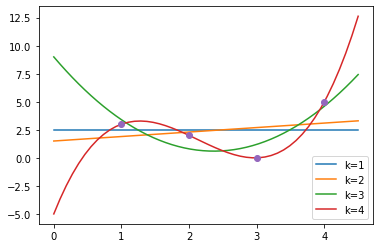

In [104]:
x = np.array([1, 2, 3, 4])
y = np.array([3, 2, 0, 5])
x_axis = np.linspace(0,4.5)

plt.plot(x_axis, res_poly_reg(coef_poly_reg(x,y,1),x_axis))
plt.plot(x_axis, res_poly_reg(coef_poly_reg(x,y,2),x_axis))
plt.plot(x_axis, res_poly_reg(coef_poly_reg(x,y,3),x_axis))
plt.plot(x_axis, res_poly_reg(coef_poly_reg(x,y,4),x_axis))

plt.plot(x,y, 'o')
plt.legend(["k=1", "k=2", "k=3", "k=4"])
for k in range(1,5):
    w = coef_poly_reg(x,y,k)
    print(f'Coefficient of k={k} is {w}')

The equation corresponding to $k=1$ is $2.5$

The equation corresponding to $k=2$ is $1.5+0.4x$

The equation corresponding to $k=3$ is $9-7.1x+1.5x^2$

The equation corresponding to $k=4$ is $-5+15.17x-8.5^2+1.33x^3$

#### 1 c)

In [105]:
def mse_poly(x,y,w): #  modification needed
    """return MSE 

    Args:
        x (np.ndarray): input x
        y (np.ndarray): expected y
        w (np.ndarray): coefficients of polynomial function

    Returns:
        mse_poly (float): MSE
    """
    sse = np.sum((y - res_poly_reg(w,x)) ** 2)
    mse_poly = sse/len(x)
    return mse_poly

print(f'MSE of k = 1 is {mse_poly(x,y,coef_poly_reg(x,y,1))}')
print(f'MSE of k = 2 is {mse_poly(x,y,coef_poly_reg(x,y,2))}')
print(f'MSE of k = 3 is {mse_poly(x,y,coef_poly_reg(x,y,3))}')
print(f'MSE of k = 4 is {mse_poly(x,y,coef_poly_reg(x,y,4))}')

MSE of k = 1 is 3.25
MSE of k = 2 is 3.0500000000000003
MSE of k = 3 is 0.8000000000000002
MSE of k = 4 is 3.973729037869803e-26


# Question 2

#### 2 a) i)

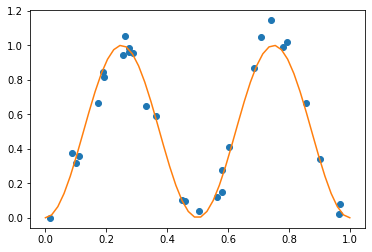

In [106]:
import math
import numpy as np

# plot random points
mu, sigma = 0, 0.07
epsilon = np.random.normal(mu, sigma, 30) # sample N(mu, sigma) 30 times
x_points = np.random.uniform(0, 1, 30) # sample U(0, 1) 30 times
y_points = (np.sin(2 * np.pi * x_points)) **2 + epsilon
plt.plot(x_points, y_points, 'o')

# plot sin function
x_axis = np.linspace(0,1)
y_axis = (np.sin(2 * np.pi * x_axis)) ** 2
plt.plot(x_axis, y_axis,)

#### 2 a) ii)

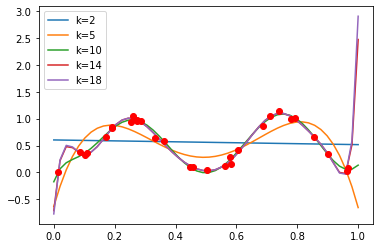

In [107]:
plt.plot(x_axis, res_poly_reg(coef_poly_reg(x_points,y_points,2),x_axis))
plt.plot(x_axis, res_poly_reg(coef_poly_reg(x_points,y_points,5),x_axis))
plt.plot(x_axis, res_poly_reg(coef_poly_reg(x_points,y_points,10),x_axis))
plt.plot(x_axis, res_poly_reg(coef_poly_reg(x_points,y_points,14),x_axis))
plt.plot(x_axis, res_poly_reg(coef_poly_reg(x_points,y_points,18),x_axis))
plt.legend(["k=2", "k=5", "k=10", "k=14", "k=18"])

plt.plot(x_points, y_points, 'ro')

#### 2 b)

Text(0.5, 1.0, 'MSE of the training set S')

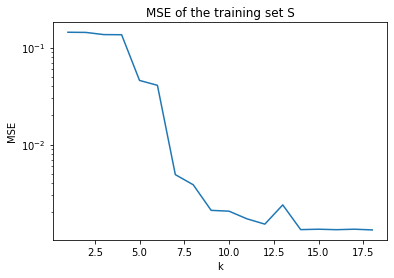

In [108]:
te = []
for k in range(1, 19):
    te.append(mse_poly(x_points,y_points,coef_poly_reg(x_points,y_points,k)))

x_axis = np.linspace(1,18,18)
plt.plot(x_axis, np.asarray(te))
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('MSE of the training set S')


#### 2 c)

Text(0.5, 1.0, 'MSE of the testing dataset T')

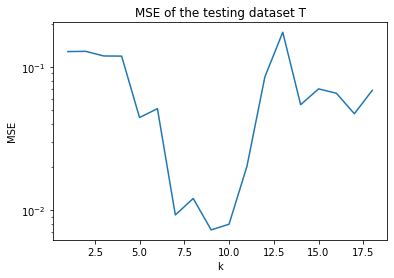

In [109]:
# plot random points
mu, sigma = 0, 0.07
epsilon = np.random.normal(mu, sigma, 1000) # sample N(mu, sigma) 30 times
x_points_2c = np.random.uniform(0, 1, 1000) # sample U(0, 1) 30 times
y_points_2c = (np.sin(2 * np.pi * x_points_2c)) **2 + epsilon

tse = []
for k in range(1, 19):
    tse.append(mse_poly(x_points_2c,y_points_2c,coef_poly_reg(x_points,y_points,k)))

x_axis = np.linspace(1,18,18)
plt.plot(x_axis, np.asarray(tse))
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('MSE of the testing dataset T')

#### 2 d)

Text(0.5, 1.0, 'average MSE of training/testing datasets')

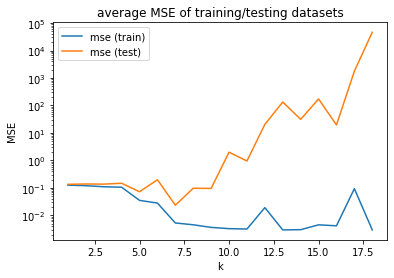

In [110]:
mu, sigma = 0, 0.07
mse_train, mse_test = [], []
for k in range(1, 19):
    mse_train_tmp, mse_test_tmp = [], []
    for j in range(100):
        epsilon_train = np.random.normal(mu, sigma, 30) # sample N(mu, sigma) 30 times
        x_points_train = np.random.uniform(0, 1, 30) # sample U(0, 1) 30 times
        y_points_train = (np.sin(2 * np.pi * x_points_train)) **2 + epsilon_train

        epsilon_test = np.random.normal(mu, sigma, 1000) # sample N(mu, sigma) 30 times
        x_points_test = np.random.uniform(0, 1, 1000) # sample U(0, 1) 30 times
        y_points_test = (np.sin(2 * np.pi * x_points_test)) **2 + epsilon_test

        w = coef_poly_reg(x_points_train,y_points_train,k)

        mse_train_tmp.append(mse_poly(x_points_train, y_points_train, w))
        mse_test_tmp.append(mse_poly(x_points_test, y_points_test, w))

    mse_train.append(np.average(mse_train_tmp))
    mse_test.append(np.average(mse_test_tmp))

x_axis = np.linspace(1,18,18)
plt.plot(x_axis, np.asarray(mse_train))
plt.plot(x_axis, np.asarray(mse_test))
plt.legend(['mse (train)', 'mse (test)'])
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title("average MSE of training/testing datasets")

## Question 3

In [38]:
def coef_sin_reg(x, y, k):
    """calculate coefficients of linear regression with a sin(k*pi*x) basis

    Args:
        x (np.ndarray): m*1 vector
        y (np.ndarray): m*1 vector
        k (int): feature map from dim 1 to k
    Returns:
        w (np.ndarray): w = (X'X)^(-1)X'y coefficients of regression
    """
    m = len(x) # number of input x
    assert len(x) == len(y)
    basis_x = np.zeros((m, k))
    for i in range(1, k+1):
        basis_x[:,i-1] = np.sin(i*(np.pi)*x)
    return scipy.linalg.solve(basis_x.T @ basis_x, basis_x.T @ y)

def res_sin_reg(w,x_axis):
    """result of polynomial function with coefficient w

    Args:
        w (np.ndarray): coefficients with k=len(w) order
        x_axis (np.ndarray): m*1 vector, points in the x-axis

    Returns:
        y_axis (np.ndarray): m*1 vector, output for inputs x_axis
    """
    y_axis = np.zeros((len(x_axis)))
    for i in range(1, len(w)+1):
        y_axis += w[i-1] * np.sin((np.pi) * i * x_axis)

    return y_axis

def mse_sin(x,y,w):
    """return MSE 

    Args:
        x (np.ndarray): input x
        y (np.ndarray): output
        w (np.ndarray): coefficients of sin basis

    Returns:
        mse (float): MSE
    """
    sse = np.sum((y - res_sin_reg(w,x)) ** 2)
    mse = sse/len(x)
    return mse

#### 3 b)

Text(0.5, 1.0, 'MSE of training dataset (sin basis)')

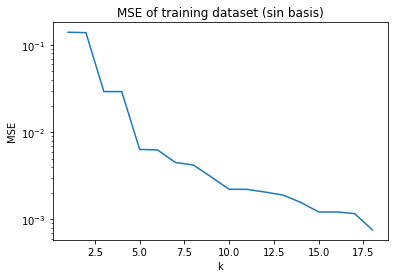

In [39]:
epsilon_train = np.random.normal(mu, sigma, 30) # sample points N(mu, sigma) 30 times
x_points_train = np.random.uniform(0, 1, 30) # sample points U(0, 1) 30 times
y_points_train = (np.sin(2 * np.pi * x_points_train)) **2 + epsilon_train # corresponding y

te = [] 
for k in range(1, 19):
    w = coef_sin_reg(x_points_train, y_points_train, k) # coefficients of sin basis
    te.append(mse_sin(x_points_train, y_points_train, w))

x_axis = np.linspace(1,18,18)
plt.plot(x_axis, np.asarray(te))
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title("MSE of training dataset (sin basis)")

#### 3 c)

Text(0.5, 1.0, 'MSE of testing dataset (sin basis)')

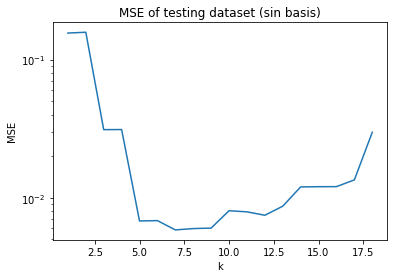

In [40]:
epsilon_test = np.random.normal(mu, sigma, 1000) # sample N(mu, sigma) 30 times
x_points_test = np.random.uniform(0, 1, 1000) # sample U(0, 1) 30 times
y_points_test = (np.sin(2 * np.pi * x_points_test)) **2 + epsilon_test

tse = []
for k in range(1, 19):
    w = coef_sin_reg(x_points_train, y_points_train, k)
    tse.append(mse_sin(x_points_test, y_points_test, w))

x_axis = np.linspace(1,18,18)
plt.plot(x_axis, np.asarray(tse))
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title("MSE of testing dataset (sin basis)")

#### 3 d)

Text(0.5, 1.0, 'average MSE of training/testing datasets (sin basis)')

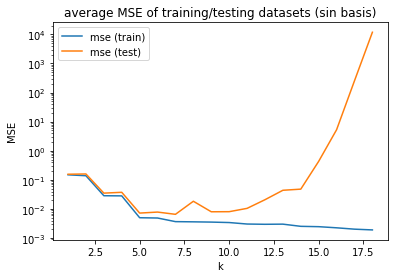

In [41]:
mu, sigma = 0, 0.07
mse_train, mse_test = [], []
for k in range(1, 19):
    mse_train_tmp, mse_test_tmp = [], []
    for j in range(100):
        epsilon_train = np.random.normal(mu, sigma, 30) # sample N(mu, sigma) 30 times
        x_points_train = np.random.uniform(0, 1, 30) # sample U(0, 1) 30 times
        y_points_train = (np.sin(2 * np.pi * x_points_train)) **2 + epsilon_train

        epsilon_test = np.random.normal(mu, sigma, 1000) # sample N(mu, sigma) 30 times
        x_points_test = np.random.uniform(0, 1, 1000) # sample U(0, 1) 30 times
        y_points_test = (np.sin(2 * np.pi * x_points_test)) **2 + epsilon_test

        w = coef_sin_reg(x_points_train,y_points_train,k)

        mse_train_tmp.append(mse_sin(x_points_train, y_points_train, w))
        mse_test_tmp.append(mse_sin(x_points_test, y_points_test, w))

    mse_train.append(np.average(mse_train_tmp))
    mse_test.append(np.average(mse_test_tmp))

x_axis = np.linspace(1,18,18)
plt.plot(x_axis, np.asarray(mse_train))
plt.plot(x_axis, np.asarray(mse_test))
plt.legend(['mse (train)', 'mse (test)'])
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title("average MSE of training/testing datasets (sin basis)")

## Question 4

#### 4 a)

In [42]:
# read .csv data
import pandas as pd
import numpy as np
import random
def train_test_index_spilt(dataset, train_size):
    """spilt the whole data set into train set and test set

    Args:
        dataset (pd.DataFrame): length of the whole dataset
        train_size (float): size of train set. 0-1

    Returns:
        np.ndarray: two ndarray: index of train and index of test
    """
    no_of_train_set = int(len(dataset) * train_size) # number of training data set
    index_train = np.asarray(random.sample(range(len(dataset)), no_of_train_set)) # generate the index of training data
    index_test = np.asarray([i for i in np.asarray(range(len(dataset))) if i not in index_train])
    return index_train, index_test

In [44]:
data = pd.read_csv('Boston-filtered.csv')
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

mse_of_train, mse_of_test = [], [] 

for i in range(20):
    # split the data set into training/testing data
    index_train, index_test = train_test_index_spilt(dataset=data, train_size=2/3)
    # generate x (ones) and slice y data
    x_train = np.ones(len(index_train))
    y_train = y.loc[index_train]
    x_test = np.ones(len(index_test))
    y_test = y.loc[index_test]
    # calculate the coefficients of linear regression
    w = coef_poly_reg(x_train, y_train, k=1)

    mse_of_train.append(mse_poly(x_train,y_train,w))
    mse_of_test.append(mse_poly(x_test,y_test,w))
print(f'the average of the label in the train data is {w}')
# get the average
ave_mse_of_train, ave_mse_of_test = np.average(mse_of_train),np.average(mse_of_test)
print(f'average MSE on the training dataset is {ave_mse_of_train}')
print(f'average MSE on the testing dataset is {ave_mse_of_test}')

[22.49614243]
average MSE on the training dataset is 84.81227492537576
average MSE on the testing dataset is 83.88680120757596


#### 4 c) LR with SINGLE attribute

In [45]:
mse_train_single_att, mse_test_single_att = {}, {}

for i in range(0, data.shape[1]-1):
    # name of the attribute
    attribute_name = data.columns[i]
    # slice data
    x = np.asarray(data.iloc[:,i])
    y = np.asarray(data.iloc[:,-1])

    mse_train, mse_test = [], []
    # repeat 20 times for averages
    for j in range(20):
        # split the data set into training/testing data
        index_train, index_test = train_test_index_spilt(dataset=data, train_size=2/3)
        # slice x,y data
        x_train = x[index_train]
        y_train = y[index_train]    
        x_test = x[index_test]
        y_test = y[index_test]
        # incorporate a bias
        x_train_bias = np.append(x_train.reshape(len(index_train),1),np.ones((len(index_train),1)),axis=1)
        x_test_bias = np.append(x_test.reshape(len(index_test),1),np.ones((len(index_test),1)),axis=1)
        # calculate the coefficients of linear regression
        w = scipy.linalg.solve(x_train_bias.T @ x_train_bias, x_train_bias.T @ y_train)
        # estimated y for training and testing data
        y_train_primed = x_train_bias @ w
        y_test_primed = x_test_bias @ w

        mse_train.append(np.sum((y_train - y_train_primed) **2) / len(y_train))
        mse_test.append(np.sum((y_test - y_test_primed) **2) / len(y_test))

    mse_train_single_att[attribute_name] = np.average(mse_train)
    mse_test_single_att[attribute_name] = np.average(mse_test)

print(f'MSE of the training data is {mse_train_single_att}')
print(f'MSE of the testing data is {mse_test_single_att}')

MSE of the training data is {'CRIM': 70.75276745986666, ' ZN ': 73.52147656913385, 'INDUS ': 65.05844672735891, 'CHAS': 80.86247683096228, 'NOX': 69.58952147626793, 'RM': 42.83782680571877, 'AGE': 73.6715507255629, 'DIS': 81.63960934803552, 'RAD': 70.71004870796806, 'TAX': 66.49290329447254, 'PTRATIO': 61.825393429721586, 'LSTAT': 37.90032741236634}
MSE of the testing data is {'CRIM': 74.37228480113156, ' ZN ': 73.75857512716416, 'INDUS ': 64.53283018377144, 'CHAS': 84.23612457474943, 'NOX': 68.21252910202332, 'RM': 45.518639076003026, 'AGE': 70.38497960286736, 'DIS': 74.6391037972427, 'RAD': 75.39307851180165, 'TAX': 65.21728225351555, 'PTRATIO': 64.68264104968723, 'LSTAT': 39.914718537251744}


#### 4 d) LR with ALL attributes

In [163]:
x_all_att = np.asarray(data.iloc[:, :-1])
y_all_att = np.asarray(data.iloc[:, -1])
mse_dict_all_att = {}
train_error = []
test_error = []
for i in range(20):
    # split the data set into training/testing data
    index_train, index_test = train_test_index_spilt(dataset=data, train_size=2/3)
    # slice x,y data
    x_train = x_all_att[index_train]
    y_train = y_all_att[index_train]    
    x_test = x_all_att[index_test]
    y_test = y_all_att[index_test]
    # incorporate a bias
    x_train_bias = np.append(x_train,np.ones((len(index_train),1)),axis=1)
    x_test_bias = np.append(x_test,np.ones((len(index_test),1)),axis=1)
    # calculate the coefficients of linear regression
    w = scipy.linalg.solve(x_train_bias.T @ x_train_bias, x_train_bias.T @ y_train)
    # estimated y for training/testing data
    y_train_primed = x_train_bias @ w
    y_test_primed = x_test_bias @ w

    train_error.append(np.sum((y_train - y_train_primed) **2) / len(y_train))
    test_error.append(np.sum((y_test - y_test_primed) **2) / len(y_test))

mse_dict_all_att["training set"] = np.average(train_error)
mse_dict_all_att["testing set"] = np.average(test_error)
print(mse_dict_all_att)


{'training set': 22.757233638080503, 'testing set': 23.42456218894828}


## Question 5

#### 5 a)

In [46]:
gamma = [2 ** (i) for i in range(-40, -25)] # len(gamma) = 15
sigma = [2 ** (i/2) for i in range(14,27,1)] # len(sigma) = 13

In [47]:
import scipy as sp
from numpy.linalg import inv
from numpy.linalg import solve
from scipy.io import loadmat
import numpy as np
from scipy.spatial.distance import cdist

def k_fold_cross_validation_datasets(k, training_dataset):
    """_summary_

    Args:
        k (int): number of folds for cross validation
        training_dataset (pd.DataFrame): (X,Y)

    Returns:
        list: a list contains k folds (pd.DataFrame)
    """
    m = training_dataset.shape[0] # number of examples in training set
    index = np.asarray(range(m))
    np.random.shuffle(index)
    folds = []

    for i in range(k):
        index_interval = int(m/k)
        start_index = i * index_interval
        end_index = (i+1) * index_interval -1
        if i == k-1:
            folds.append(training_dataset.loc[start_index:,:]) # collect the rest data
        else:
            folds.append(training_dataset.loc[start_index:end_index,:])
    return folds

def gaussian_kernel(x_1, x_2, sigma):
    """gaussian kernel of x_1 and x_2

    Args:
        x1 (np.ndarray): shape (m_1, n). m_2 examples, n features
        x2 (np.ndarray): shape (m_2, n). m_2 examples, n features
        sigma (float): parameter

    Returns:
        K : shape (m_1, m_2). Kernel matrix
    """
    assert(x_1.shape[1] == x_2.shape[1])
    K = cdist(x_1, x_2, 'euclidean')
    K = np.exp(-(K ** 2) / (2. * sigma ** 2))
    return K

def train_kernel_ridge(x_train, y_train, sigma, gam):
    """alpha of the ridge regression

    Args:
        x_train (np.ndarray): shape (m, n_1). m examples, n_1 features
        y_train (np.ndarray): shape (m, n_2). m examples, n_2 features
        sigma (float): parameter
        gam (float): parameter

    Returns:
        alpha (np.ndarray): shape (m, n_2).
    """

    K = gaussian_kernel(x_train, x_train, sigma)
    ell = K.shape[0]
    alpha = np.dot(inv(K + gam * ell * np.eye(ell)), y_train)
    return alpha

def apply_kernel_ridge(alpha, x_train, x_test, sigma):
    """predict result of x_test data

    Args:
        alpha (np.ndarray): 
        x_train (np.ndarray): shape (m_1, n_1). m_1 examples, n_1 features
        x_test (np.ndarray): shape (m_2, n_1). m_1 examples, n_1 features
        sigma (float): _description_

    Returns:
        y_pred (np.ndarray): shape (m_2, n_2). m_2 examples, n_2 features
    """
    K = gaussian_kernel(x_test, x_train, sigma)
    y_pred = np.dot(K, alpha)
    return y_pred
    

In [48]:
data = pd.read_csv('Boston-filtered.csv')
index_train, index_test = train_test_index_spilt(dataset=data, train_size=2/3)
training_dataset = data.loc[index_train]
testing_dataset = data.loc[index_test]
testing_dataset.reset_index(drop=True, inplace=True)
training_dataset.reset_index(drop=True, inplace=True)

folds = k_fold_cross_validation_datasets(5, training_dataset)

In [49]:
res_kernel_ridge_reg = {}
for gam in gamma:
    for sig in sigma:
        y_pred_five_folds = []
        for i in range(len(folds)):
            # select testing data and merge the rest DataFrame as training data
            test_data = folds[i]
            train_data = pd.concat([folds[j] for j in range(len(folds)) if j != i])
            # slice x,y data
            x_train = np.asarray(train_data.iloc[:,:-1])
            y_train = np.asarray(train_data.iloc[:,-1])
            x_test = np.asarray(test_data.iloc[:,:-1])
            y_test = np.asarray(test_data.iloc[:,-1])
            # compute alpha in the training data set
            alpha = train_kernel_ridge(x_train,y_train,sig,gam)
            # predict y_test by alpha and kernel function
            y_pred_one_fold = apply_kernel_ridge(alpha, x_train, x_test,sig)
            # mse error for the fold
            error = np.sum((y_test - y_pred_one_fold) ** 2) / y_test.shape[0]
            y_pred_five_folds.append(error)
        res_kernel_ridge_reg[f'gamma, sigma : {np.log2(gam)}, {np.log2(sig)}'] = y_pred_five_folds            

In [50]:
key_list = []
value_list = []
x,y = [], []
for k,v in res_kernel_ridge_reg.items():
    key_list.append(k)
    value_list.append(np.average(v))
    x.append(float(k.split(":")[1].split(',')[0]))
    y.append(float(k.split(":")[1].split(',')[1]))

smallest_index = value_list.index(min(value_list))
print(f'KRG with the order of {key_list[smallest_index]} obtains the smallest average mse {value_list[smallest_index]} using five-fold cross-validation')

KRG with the order of gamma, sigma : -35.0, 10.5 obtains the smallest average mse 12.62210217257536 using five-fold cross-validation


#### 5 b)

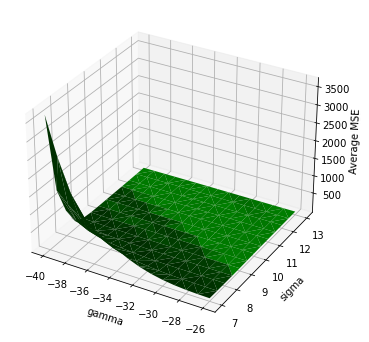

In [169]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D surface
ax.plot_trisurf(np.asarray(x), np.asarray(y), np.asarray(value_list), color ='green')
ax.set_xlabel('gamma')
ax.set_ylabel('sigma')
ax.set_zlabel('Average MSE')

plt.show()

#### 5 c)

In [51]:
text_str = key_list[smallest_index].split(":")[1].split(',')

gamma_best = 2 ** float(text_str[0])
sigma_best = 2 ** float(text_str[1])

x_train_5c = np.asarray(training_dataset.iloc[:,:-1])
y_train_5c = np.asarray(training_dataset.iloc[:,-1])
x_test_5c = np.asarray(testing_dataset.iloc[:,:-1])
y_test_5c = np.asarray(testing_dataset.iloc[:,-1])

alpha_5c = train_kernel_ridge(x_train_5c, y_train_5c, sigma_best,gamma_best)

y_test_pred_5c = apply_kernel_ridge(alpha_5c, x_train_5c, x_test_5c,sigma_best)
testing_error_5c = np.sum((y_test_5c - y_test_pred_5c) ** 2) / y_test_5c.shape[0]

y_train_pred_5c = apply_kernel_ridge(alpha_5c, x_train_5c, x_train_5c, sigma_best)
training_error_5c = np.sum((y_train_5c - y_train_pred_5c) ** 2) / y_train_5c.shape[0]


print(f'testing error is {testing_error_5c}, training error is {training_error_5c} with best (gamma, sigma): 2^({np.log2(gamma_best)}), 2^({np.log2(sigma_best)}) on the complete data')

testing error is 16.422793920882086, training error is 6.844691254814198 with best (gamma, sigma): 2^(-35.0), 2^(10.5) on the complete data


#### 5 d)

In [53]:
data = pd.read_csv('Boston-filtered.csv')

mse_nr_tr, mse_nr_te = [], []
mse_lr_att_tr, mse_lr_att_te = [], []
mse_lr_atts_tr, mse_lr_atts_te = [], []
gamma = [2 ** (i) for i in range(-40, -25)] # len(gamma) = 15
sigma = [2 ** (i/2) for i in range(14,27,1)] # len(sigma) = 13
mse_krg_tr, mse_krg_te = [], []

for iteration in range(20):
    # data preparation
    index_tr, index_te = train_test_index_spilt(data, 2/3)
    tr_set = data.loc[index_tr]
    te_set = data.loc[index_te]
    tr_set.reset_index(drop=True, inplace=True)
    te_set.reset_index(drop=True, inplace=True)
    folds = k_fold_cross_validation_datasets(5, te_set)

    # exercise 4a Naive Regression
    nr_x_tr, nr_x_te = np.ones(len(tr_set)), np.ones(len(te_set))
    nr_y_tr, nr_y_te = tr_set.iloc[:, -1], te_set.iloc[:, -1]
    # calculate the coefficients of linear regression
    nr_para_w = coef_poly_reg(nr_x_tr, nr_y_tr, k=1)
    # record mse for train/test data sets
    mse_nr_tr.append(mse_poly(nr_x_tr, nr_y_tr, nr_para_w))
    mse_nr_te.append(mse_poly(nr_x_te, nr_y_te, nr_para_w))

    # exercise 4c Linear Regression with single attributes
    attribute_names = data.columns[:-1]
    num_of_atts = len(attribute_names)
    mse_lr_single_tr_tmp, mse_lr_single_te_tmp = [], []
    for index_of_att in range(num_of_atts):
        att = attribute_names[index_of_att]
        # select data of the corresponding attribute
        att_x_tr, att_x_te = np.asarray(tr_set[att]), np.asarray(te_set[att])
        att_y_tr, att_y_te = np.asarray(tr_set.iloc[:, -1]), np.asarray(te_set.iloc[:, -1])
        # incorporate a bias
        l_x_tr, l_x_te = len(att_x_tr), len(att_x_te)
        att_x_tr_bias, att_x_te_bias = np.append(att_x_tr.reshape(l_x_tr, 1), np.ones((l_x_tr, 1)), axis=1), np.append(att_x_te.reshape(l_x_te, 1), np.ones((l_x_te, 1)), axis=1)
        # calculate the coefficients
        att_para_w = scipy.linalg.solve(att_x_tr_bias.T @ att_x_tr_bias, att_x_tr_bias.T @ att_y_tr)
        # predict y_pred for train/test data
        att_y_tr_pred, att_y_te_pred = att_x_tr_bias @ att_para_w, att_x_te_bias @ att_para_w
        # calculate mse with y and y_pred
        att_error_tr, att_error_te = np.sum((att_y_tr_pred - att_y_tr) **2) / (l_x_tr), np.sum((att_y_te_pred - att_y_te) **2) / (l_x_te)
        # record mse for all attributes in single iteration
        mse_lr_single_tr_tmp.append(att_error_tr)
        mse_lr_single_te_tmp.append(att_error_te)

    mse_lr_att_tr.append(mse_lr_single_tr_tmp)
    mse_lr_att_te.append(mse_lr_single_te_tmp)
        
    # exercise 4d Linear Regression with all attributes
    # data preparation
    atts_x_tr, atts_x_te = np.asarray(tr_set.iloc[:, :-1]), np.asarray(te_set.iloc[:, :-1])
    atts_y_tr, atts_y_te = np.asarray(tr_set.iloc[:, -1]), np.asarray(te_set.iloc[:, -1])
    # incorporate a bias
    atts_x_tr_bias, atts_x_te_bias = np.append(atts_x_tr, np.ones((l_x_tr, 1)), axis=1), np.append(atts_x_te, np.ones((l_x_te, 1)), axis=1)
    # calculate the coefficients
    atts_para_w = scipy.linalg.solve(atts_x_tr_bias.T @ atts_x_tr_bias, atts_x_tr_bias.T @ atts_y_tr)
    # predict y_pred for train/test data
    atts_y_tr_pred, atts_y_te_pred = atts_x_tr_bias @ atts_para_w, atts_x_te_bias @ atts_para_w
    # calculate mse with y and y_pred
    atts_error_tr, atts_error_te = np.sum((atts_y_tr_pred - atts_y_tr) **2) / (l_x_tr), np.sum((atts_y_te_pred - atts_y_te) **2) / (l_x_te)
    # record mse
    mse_lr_atts_tr.append(atts_error_tr)
    mse_lr_atts_te.append(atts_error_te)

    # exercise 5d get the best (gamma, sigma)
    smallest_error = 1e10
    best_gamma, best_sigma = 0, 0
    for gam in gamma:
        for sig in sigma:
            y_pred_five_folds = []
            for i in range(len(folds)):
                # select testing data and merge the rest DataFrame as training data
                test_data = folds[i]
                train_data = pd.concat([folds[j] for j in range(len(folds)) if j != i])
                # slice x,y data
                x_train = np.asarray(train_data.iloc[:,:-1])
                y_train = np.asarray(train_data.iloc[:,-1])
                x_test = np.asarray(test_data.iloc[:,:-1])
                y_test = np.asarray(test_data.iloc[:,-1])
                # compute alpha in the training data set
                alpha = train_kernel_ridge(x_train,y_train,sig,gam)
                # predict y_test by alpha and kernel function
                y_pred_one_fold = apply_kernel_ridge(alpha, x_train, x_test,sig)
                # mse error for the fold
                error = np.sum((y_test - y_pred_one_fold) ** 2) / y_test.shape[0]
                y_pred_five_folds.append(error)
            if np.average(y_pred_five_folds) < smallest_error:
                smallest_error, best_gamma, best_sigma = np.average(y_pred_five_folds), gam, sig

    # exercise 5c get MSE on the training and test sets for the best gamma and sigma
    x_train_5c, y_train_5c = np.asarray(tr_set.iloc[:,:-1]), np.asarray(tr_set.iloc[:,-1])
    x_test_5c, y_test_5c = np.asarray(te_set.iloc[:,:-1]), np.asarray(te_set.iloc[:,-1])

    alpha_5c = train_kernel_ridge(x_train_5c, y_train_5c, best_sigma, best_gamma)

    y_test_pred_5c = apply_kernel_ridge(alpha_5c, x_train_5c, x_test_5c, best_sigma)
    testing_error_5c = np.sum((y_test_5c - y_test_pred_5c) ** 2) / y_test_5c.shape[0]

    y_train_pred_5c = apply_kernel_ridge(alpha_5c, x_train_5c, x_train_5c, best_sigma)
    training_error_5c = np.sum((y_train_5c - y_train_pred_5c) ** 2) / y_train_5c.shape[0]

    mse_krg_tr.append(training_error_5c)
    mse_krg_te.append(testing_error_5c)

# list to nd.array

In [54]:
print(f'Naive Regression: MSE train = {np.average(mse_nr_tr)} +_ sigma {np.std(mse_nr_tr)}, MSE test = {np.average(mse_nr_te)} +_ sigma {np.std(mse_nr_te)}')
tmp_att_tr, tmp_att_te = np.asarray(mse_lr_att_tr), np.asarray(mse_lr_att_te)
for i in range(12):
    print(f'LR (attribute {i+1}): MSE train = {np.average(tmp_att_tr[:,i])} +_ sigma {np.std(tmp_att_tr[:,i])}, MSE test = {np.average(tmp_att_te[:,i])} +_ sigma {np.std(tmp_att_te[:,i])}')
print(f'LR (attribute all): MSE train = {np.average(mse_lr_atts_tr)} +_ sigma {np.std(mse_lr_atts_tr)}, MSE test = {np.average(mse_lr_atts_te)} +_ sigma {np.std(mse_lr_atts_te)}')
print(f'Kernel Ridge Regression: MSE train = {np.average(mse_krg_tr)} +_ sigma {np.std(mse_krg_tr)}, MSE test = {np.average(mse_krg_te)} +_ sigma {np.std(mse_krg_te)}')

Naive Regression: MSE train = 83.87545331912759 +_ sigma 4.70401818077714, MSE test = 85.74226458862091 +_ sigma 9.236528470751695
LR (attribute 1): MSE train = 70.95760584626518 +_ sigma 4.083172509520799, MSE test = 74.26830550659419 +_ sigma 8.130861712430345
LR (attribute 2): MSE train = 73.2131542367726 +_ sigma 4.64934036113911, MSE test = 74.26201528527687 +_ sigma 9.13711548072134
LR (attribute 3): MSE train = 64.41670432078449 +_ sigma 4.589688039296907, MSE test = 65.52708498377785 +_ sigma 9.107724620352863
LR (attribute 4): MSE train = 81.4450926248503 +_ sigma 4.356550347480965, MSE test = 83.10966834068833 +_ sigma 8.630006043540766
LR (attribute 5): MSE train = 68.42980706453395 +_ sigma 4.577076177665761, MSE test = 70.47437238689055 +_ sigma 9.059364684797268
LR (attribute 6): MSE train = 42.70682425785488 +_ sigma 3.5672062365598745, MSE test = 45.76732713493142 +_ sigma 7.254982652085324
LR (attribute 7): MSE train = 71.92607087244852 +_ sigma 4.934450338606833, MSE 

## Problem 6

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from mlxtend.plotting import plot_decision_regions

class KNN:
    def __init__(self,k=3):
        # choose the k nearest X
        self.k = k

    def fit(self,X,y):
        # X: data
        # y: label
        self.X_train = X
        self.y_train = y

    def predict(self,X_test):
        predicted_labels = [self._predict(x) for x in X_test]
        return np.array(predicted_labels)

    def _predict(self,x_test):
        tree = KDTree(self.X_train)
        distances, indexes = tree.query([x_test], k=self.k)
        labels = self.y_train[indexes]
        y_pred = np.argmax(np.bincount(labels[0])) # when k is even, return y_pred=0 if number of y=0, y=1 is equal.
        return y_pred

def generate_label_y(X, model):
    num_of_points = X.shape[0]
    sample = np.random.uniform(0,1,num_of_points)
    y_label = []
    for i in range(num_of_points):
        if sample[i] <= 0.8:
            tmp = X[i,:]
            y_label.append(model.predict([tmp]))
        else:
            y_label.append(np.asarray([1 if np.random.uniform(0,1,1) else 0]))
    return np.asarray(y_label).reshape(num_of_points,)

Text(0, 0.5, 'y')

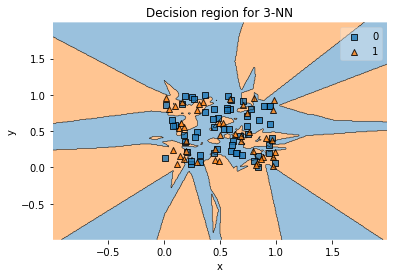

In [56]:
x_1, x_2 = np.random.uniform(0,1,100), np.random.uniform(0,1,100)
y = np.asarray([1 if i >= 0.5 else 0 for i in np.random.uniform(0,1,100)])
model_v3 = KNN(k=3)
X = np.asarray([x_1, x_2]).transpose()
model_v3.fit(X, y)
plot_decision_regions(X, y, clf=model_v3)
plt.title("Decision region for 3-NN")
plt.xlabel('x')
plt.ylabel('y')

In [5]:
error_k = []
for k in range(1,50): # running time 40 mins on Mac M1 Pro
    error_iteration = []
    for i in range(100):
        X_train = np.asarray([np.random.uniform(0,1,4000), np.random.uniform(0,1,4000)]).transpose()
        X_test = np.asarray([np.random.uniform(0,1,1000), np.random.uniform(0,1,1000)]).transpose()
        y_train, y_test = generate_label_y(X_train, model_v3), generate_label_y(X_test, model_v3)

        model_k = KNN(k)
        model_k.fit(X_train, y_train)
        y_pred = model_k.predict(X_test)
        error = sum(abs(y_pred - y_test))
        error_iteration.append(error)
    error_k.append(np.average(error_iteration))

Text(0, 0.5, 'generalization error')

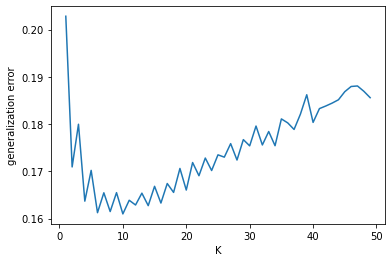

In [ ]:
gen_error = np.asarray(error_k)/1000
plt.plot(np.linspace(1,49,49), gen_error)
plt.xlabel("K")
plt.ylabel("generalization error")

In [7]:
num_of_m = [100]
[num_of_m.append(i) for i in range(500,4001,500)]
k_m = [] # optimal k corresponding to each m
for m in num_of_m:
    best_k_in_iterations= [] #  best ks in 100 iterations with m
    for iteration in range(100):
        error_record, k_record = 1000, 0
        for k in range(1,50):
            X_train = np.asarray([np.random.uniform(0,1,m), np.random.uniform(0,1,m)]).transpose()
            X_test = np.asarray([np.random.uniform(0,1,1000), np.random.uniform(0,1,1000)]).transpose()
            y_train, y_test = generate_label_y(X_train, model_v3), generate_label_y(X_test, model_v3)
            model_k = KNN(k)
            model_k.fit(X_train, y_train)
            y_pred = model_k.predict(X_test)
            error = sum(abs(y_pred - y_test))
            if error < error_record:
                error_record = error
                k_record = k
        best_k_in_iterations.append(k_record)
    k_m.append(np.average(best_k_in_iterations))
k_m # [5.37, 6.34, 7.46, 8.69, 8.31, 9.44, 10.56, 11.06, 11.99] for n = 100,..., 4000, running time 260 mins on Mac M1 Pro

[5.37, 6.34, 7.46, 8.69, 8.31, 9.44, 10.56, 11.06, 11.99]

Text(0, 0.5, 'optimal k')

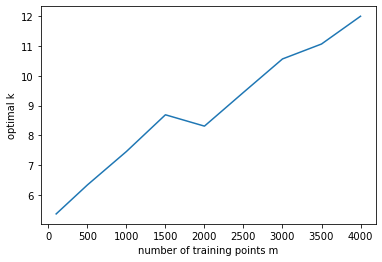

In [9]:
plt.plot(num_of_m, k_m)
plt.xlabel('number of training points m')
plt.ylabel('optimal k')
